In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('./data/train.csv')


In [3]:
train1 = train.copy()

In [4]:
# train.head()

In [5]:
# train.sample(5)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
train.isnull().sum(axis = 0)[train.isnull().sum(axis = 0) > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
#train.dtypes

In [9]:
#train.dtypes[train.dtypes == "object"]

In [10]:
# train = train1.copy()
train = train.drop('MiscFeature', axis = 1)
train2 = train.copy()

In [11]:
# train = train2.copy()

In [12]:
train['MasVnrArea'] = train['MasVnrArea'].interpolate(method='linear', axis = 0)
train['GarageYrBlt'] = train['GarageYrBlt'].interpolate(method='linear', axis = 0)

### Distribution of SalePrice

Text(0.5, 0, 'Sale Price')

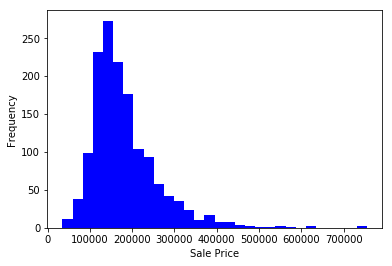

In [13]:
train['SalePrice'].plot.hist(stacked = False, bins = 30, color = 'b')
plt.xlabel('Sale Price')

Text(0.5, 0, 'Log(Sale Price)')

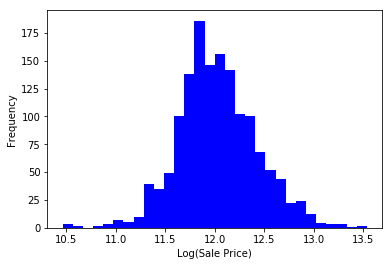

In [14]:
np.log(train['SalePrice']).plot.hist(stacked = False, bins = 30, color = 'b')
plt.xlabel('Log(Sale Price)')

#### Dividing in Numeric, Ordinal and Nominal

In [15]:
numeric_col = ['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
               'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 
               'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
               'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
               'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
ordinal_col = ['LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual',
                'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual',
                'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']
nominal_col = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1',
            'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
            'Foundation', 'Heating', 'CentralAir', 'GarageType', 'PavedDrive' 'MiscFeature', 'SaleType', 'SaleCondition']

#### Replacing values in ordinal variables by integers as per order

In [16]:
train.BsmtCond = train.BsmtCond.replace({"Ex": 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
train.BsmtCond = train.BsmtCond.fillna(0)
train.BsmtExposure = train.BsmtExposure.replace({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1})
train.BsmtExposure = train.BsmtExposure.fillna(0)
train.BsmtFinType1 = train.BsmtFinType1.replace({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1})
train.BsmtFinType1 = train.BsmtFinType1.fillna(0)
train.BsmtFinType2 = train.BsmtFinType2.replace({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1})
train.BsmtFinType2 = train.BsmtFinType2.fillna(0)
train.BsmtQual = train.BsmtQual.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
train.BsmtQual = train.BsmtQual.fillna(0)
train.Electrical = train.Electrical.replace({'SBrkr': 4, 'FuseA': 3, 'FuseF': 2, 'FuseP': 1, 'Mix': 0})
train.ExterCond = train.ExterCond.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
train.ExterCond = train.ExterCond.fillna(0)
train.ExterQual = train.ExterQual.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
train.ExterQual = train.ExterQual.fillna(0)
train.Fence = train.Fence.replace({'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1})
train.Fence = train.Fence.fillna(0)
train.FireplaceQu = train.FireplaceQu.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
train.FireplaceQu = train.FireplaceQu.fillna(0)
train.Functional = train.Functional.replace({'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0})
train.GarageCond = train.GarageCond.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
train.GarageCond = train.GarageCond.fillna(0)
train.GarageFinish = train.GarageFinish.replace({'Fin': 3, 'RFn': 2, 'Unf': 1})
train.GarageFinish = train.GarageFinish.fillna(0)
train.GarageQual = train.GarageQual.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
train.GarageQual = train.GarageQual.fillna(0)
train.HeatingQC = train.HeatingQC.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
train.HeatingQC = train.HeatingQC.fillna(0)
train.KitchenQual = train.KitchenQual.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
train.KitchenQual = train.KitchenQual.fillna(0)
train.LandSlope = train.LandSlope.replace({'Gtl': 3, 'Mod': 2, 'Sev': 1})
train.LandSlope = train.LandSlope.fillna(0)
train.LotShape = train.LotShape.replace({'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1})
train.LotShape = train.LotShape.fillna(0)
train.PoolQC = train.PoolQC.replace({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1})
train.PoolQC = train.PoolQC.fillna(0)
train.Utilities = train.Utilities.replace({'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, ' ELO': 1})

In [17]:
train3 = train.copy()
#train = train3.copy

In [18]:
threshold = 0.4

### Analyzing Numeric Variables

In [19]:
train_num_corr = train[numeric_col].corr(method = 'pearson')
#train_num_corr

In [20]:
#train[''].corr(method = 'pearson')

In [21]:
# numeric variables that have correlation of more than 0.4 with Sales Price
high_pearson = train_num_corr['SalePrice'][np.absolute(train_num_corr['SalePrice'])>= threshold]
# high_pearson

In [22]:
high_cor_num_col = high_pearson.index.values
high_cor_num_col = np.delete(high_cor_num_col, -1)   # removing 'SalePrice'
high_cor_num_col

array(['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea'], dtype=object)

In [23]:
# checking for multi-collinearity between high_cor_num_col
train[high_cor_num_col].corr(method = 'pearson')

,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea
YearBuilt,1.000000,0.592855,0.313659,0.391452,0.281986,0.199010,0.468271,0.095589,0.147716,0.775012,0.537850,0.478954
YearRemodAdd,0.592855,1.000000,0.178187,0.291066,0.240379,0.287389,0.439046,0.191740,0.112581,0.615723,0.420622,0.371600
MasVnrArea,0.313659,0.178187,1.000000,0.361005,0.340734,0.390527,0.275810,0.281308,0.250683,0.246489,0.362967,0.371416
TotalBsmtSF,0.391452,0.291066,0.361005,1.000000,0.819530,0.454868,0.323722,0.285573,0.339519,0.312769,0.434585,0.486665
1stFlrSF,0.281986,0.240379,0.340734,0.819530,1.000000,0.566024,0.380637,0.409516,0.410531,0.220422,0.439317,0.489782
GrLivArea,0.199010,0.287389,0.390527,0.454868,0.566024,1.000000,0.630012,0.825489,0.461679,0.213985,0.467247,0.468997
FullBath,0.468271,0.439046,0.275810,0.323722,0.380637,0.630012,1.000000,0.554784,0.243671,0.457084,0.469672,0.405656
TotRmsAbvGrd,0.095589,0.191740,0.281308,0.285573,0.409516,0.825489,0.554784,1.000000,0.326114,0.131438,0.362289,0.337822
Fireplaces,0.147716,0.112581,0.250683,0.339519,0.410531,0.461679,0.243671,0.326114,1.000000,0.045341,0.300789,0.269141
GarageYrBlt,0.775012,0.615723,0.246489,0.312769,0.220422,0.213985,0.457084,0.131438,0.045341,1.000000,0.487842,0.481105


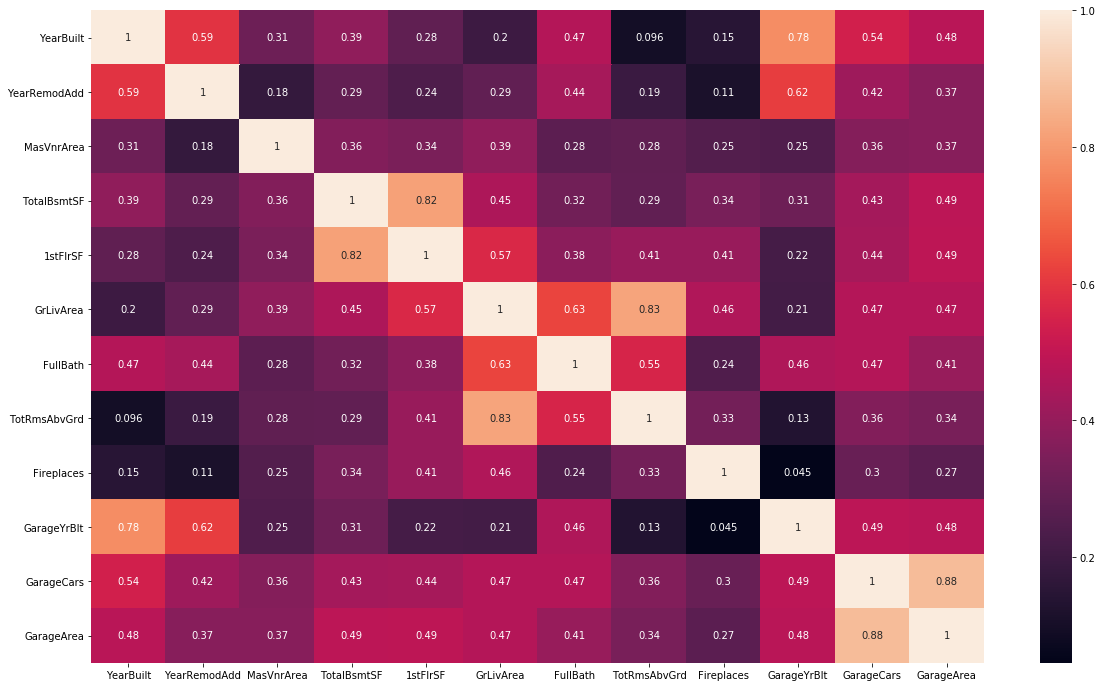

In [24]:
plt.figure(figsize=(20, 12))
sns.heatmap(train[high_cor_num_col].corr(method = 'pearson'), annot=True)


#### Visual inspection of low-correlation numeric columns to identify non-linear relationships, if any

In [25]:
low_pearson = train_num_corr['SalePrice'][np.absolute(train_num_corr['SalePrice'])< threshold]
low_cor_num_col = low_pearson.index.values
low_cor_num_col

array(['Id', 'LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype=object)

In [26]:
# for item in low_cor_num_col:
#     plt.subplots(figsize=(8, 6))
#     plt.scatter(x = item, y = 'SalePrice', data=train)
#     plt.xlabel(item)
#     plt.ylabel('SalePrice')

In [27]:
# no good non-linear relationship is visible

### Analyzing Ordinal Variables

In [28]:
train_ord_corr = ordinal_col + ['SalePrice']          # adding SalePrice to check correlation with that also
train_ord_corr = train[train_ord_corr].corr(method = 'spearman')
#train_ord_corr

In [29]:
# ordinal variables that have correlation of 0.5 or more with Sales Price
high_spearman = train_ord_corr['SalePrice'][np.absolute(train_ord_corr['SalePrice'])>= threshold]
high_spearman

OverallQual     0.809829
ExterQual       0.684014
BsmtQual        0.678026
HeatingQC       0.491392
KitchenQual     0.672849
FireplaceQu     0.537602
GarageFinish    0.633974
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [30]:
high_cor_ord_col = high_spearman.index.values
index = np.argwhere(high_cor_ord_col == 'SalePrice')
high_cor_ord_col = np.delete(high_cor_ord_col, index)   # removing 'SalePrice'
high_cor_ord_col

array(['OverallQual', 'ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageFinish'], dtype=object)

In [31]:
# ordinal variables that have correlation of less than 0.5 with Sales Price
low_spearman = train_ord_corr['SalePrice'][np.absolute(train_ord_corr['SalePrice'])< threshold]


In [32]:
low_cor_ord_col = low_spearman.index.values
index = np.argwhere(low_cor_ord_col == 'SalePrice')
low_cor_ord_col = np.delete(low_cor_ord_col, index)   # removing 'SalePrice'
low_cor_ord_col

array(['LotShape', 'Utilities', 'LandSlope', 'OverallCond', 'ExterCond',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence'], dtype=object)

#### Visual inspection of low-correlation ordinal columns to identify non-linear relationships, if any

In [33]:
# for item in low_cor_ord_col:
#     plt.subplots(figsize=(8, 6))
#     sns.boxplot(x = item, y = 'SalePrice', data=train) 
    


### Analyzing Nominal Variables

In [34]:
high_cor_nom_var = ['MSSubClass', 'MSZoning', 'Neighborhood', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType']

In [35]:
train.MSSubClass = train.MSSubClass.replace({ 180:0, \
30:0, 45:0, 190:0, 50:0, 90:0, 85:0, 40:0, 160:0,70:1, 20:1, 75:1, \
80:1, 120:1, 60:1, 150:1}) # Grvl: Gravel, Pave: Paved, NA: No alley access

train.MSZoning = train.MSZoning.replace( {"A": 0, "C (all)": 0, "FV":1, "I": 0, "RH": 0, "RL": 1, "RP": 1, "RM": 0} )

train.Neighborhood = train.Neighborhood.replace({"Blmngtn":1, "Blueste":0, "BrDale":0, \
   "BrkSide":0, "ClearCr":2, "CollgCr":2, "Crawfor":2, "Edwards":0, "Gilbert":1, \
   "IDOTRR":0, "MeadowV":0, "Mitchel":1, "NAmes":0, "NoRidge":4, "NPkVill":0, \
   "NridgHt":4, "NWAmes":1, "OldTown":0, "SWISU":0, "Sawyer":0,"SawyerW":1, \
   "Somerst":2, "StoneBr":3, "Timber":2, "Veenker":2})

train.Exterior1st = train.Exterior1st.replace({\
    "AsbShng":1, "AsphShn":1, "BrkComm":0, "BrkFace":2, "CBlock":1, "CemntBd":3, \
    "HdBoard":2, "ImStucc":4, "MetalSd":1, "Other":1, "Plywood": 2, "PreCast": 1, \
    "Stone": 4, "Stucco":1, "VinylSd":3, "Wd Sdng":1, "WdShing":1 })

train.Exterior2nd = train.Exterior2nd.replace({"AsbShng":0, "AsphShn":0, "Brk Cmn":1,\
"BrkFace":1, "CBlock":0, "CmentBd":2, "HdBoard":1, "ImStucc":1,\
"MetalSd":0, "Other":4, "Plywood":1, "PreCast":1, \
"Stone":1, "Stucco":0, "VinylSd":2,"Wd Sdng":0, "Wd Shng":0 })

train.MasVnrType = train.MasVnrType.fillna("NoMasonry")
train.MasVnrType = train.MasVnrType.replace({\
        "BrkCmn":0, "BrkFace":1, "CBlock": 1, "None":0, "Stone":2, "NoMasonry":0})

train.Foundation = train.Foundation.replace({"BrkTil":0, "CBlock":0, "PConc":2, "Slab":0, "Stone":0, "Wood":1})

train.GarageType = train.GarageType.fillna('NoGarage')
train.GarageType = train.GarageType.replace({\
    "2Types":1, "Attchd":1, "Basment":1, "BuiltIn":2, "CarPort":0, "Detchd":0, "NoGarage": 0})


In [36]:
train4 = train.copy()

In [37]:
#train[high_cor_ord_var]

### Data Set for Modelling

In [38]:
imp_var = np.concatenate([high_cor_num_col, high_cor_ord_col, high_cor_nom_var, ['SalePrice']])

In [39]:
train_red = train[imp_var]

In [40]:
train_red.isnull().sum(axis = 0)[train_red.isnull().sum(axis = 0) > 0]

Series([], dtype: int64)

In [51]:
train_red.shape

(1460, 28)

train_red1 = train_red.copy()

In [42]:
#train_red.to_csv('./data/train_red.csv')

## Test Data

In [43]:
test = pd.read_csv('./data/test.csv')
test = test.drop('MiscFeature', axis = 1)
test['MasVnrArea'] = test['MasVnrArea'].interpolate(method='linear', axis = 0)
test['GarageYrBlt'] = test['GarageYrBlt'].interpolate(method='linear', axis = 0)

In [44]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,120,0,NaN,MnPrv,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,MnPrv,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,144,0,NaN,NaN,0,1,2010,WD,Normal


#### Replacing ordinal values in Test

In [45]:
test.BsmtCond = test.BsmtCond.replace({"Ex": 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
test.BsmtCond = test.BsmtCond.fillna(0)
test.BsmtExposure = test.BsmtExposure.replace({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1})
test.BsmtExposure = test.BsmtExposure.fillna(0)
test.BsmtFinType1 = test.BsmtFinType1.replace({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1})
test.BsmtFinType1 = test.BsmtFinType1.fillna(0)
test.BsmtFinType2 = test.BsmtFinType2.replace({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1})
test.BsmtFinType2 = test.BsmtFinType2.fillna(0)
test.BsmtQual = test.BsmtQual.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
test.BsmtQual = test.BsmtQual.fillna(0)
test.Electrical = test.Electrical.replace({'SBrkr': 4, 'FuseA': 3, 'FuseF': 2, 'FuseP': 1, 'Mix': 0})
test.ExterCond = test.ExterCond.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
test.ExterCond = test.ExterCond.fillna(0)
test.ExterQual = test.ExterQual.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
test.ExterQual = test.ExterQual.fillna(0)
test.Fence = test.Fence.replace({'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1})
test.Fence = test.Fence.fillna(0)
test.FireplaceQu = test.FireplaceQu.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
test.FireplaceQu = test.FireplaceQu.fillna(0)
test.Functional = test.Functional.replace({'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0})
test.GarageCond = test.GarageCond.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
test.GarageCond = test.GarageCond.fillna(0)
test.GarageFinish = test.GarageFinish.replace({'Fin': 3, 'RFn': 2, 'Unf': 1})
test.GarageFinish = test.GarageFinish.fillna(0)
test.GarageQual = test.GarageQual.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
test.GarageQual = test.GarageQual.fillna(0)
test.HeatingQC = test.HeatingQC.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
test.HeatingQC = test.HeatingQC.fillna(0)
test.KitchenQual = test.KitchenQual.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
test.KitchenQual = test.KitchenQual.fillna(0)
test.LandSlope = test.LandSlope.replace({'Gtl': 3, 'Mod': 2, 'Sev': 1})
test.LandSlope = test.LandSlope.fillna(0)
test.LotShape = test.LotShape.replace({'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1})
test.LotShape = test.LotShape.fillna(0)
test.PoolQC = test.PoolQC.replace({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1})
test.PoolQC = test.PoolQC.fillna(0)
test.Utilities = test.Utilities.replace({'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, ' ELO': 1})

#### Nominal Variables

###### Replacing values of high-correlation variables

In [46]:
test.MSSubClass = test.MSSubClass.replace({ 180:0, \
30:0, 45:0, 190:0, 50:0, 90:0, 85:0, 40:0, 160:0,70:1, 20:1, 75:1, \
80:1, 120:1, 60:1, 150:1})

test.MSZoning = test.MSZoning.replace( {"A": 0, "C (all)": 0, "FV":1, "I": 0, "RH": 0, "RL": 1, "RP": 1, "RM": 0} )

test.Neighborhood = test.Neighborhood.replace({"Blmngtn":1, "Blueste":0, "BrDale":0, \
   "BrkSide":0, "ClearCr":2, "CollgCr":2, "Crawfor":2, "Edwards":0, "Gilbert":1, \
   "IDOTRR":0, "MeadowV":0, "Mitchel":1, "NAmes":0, "NoRidge":4, "NPkVill":0, \
   "NridgHt":4, "NWAmes":1, "OldTown":0, "SWISU":0, "Sawyer":0,"SawyerW":1, \
   "Somerst":2, "StoneBr":3, "Timber":2, "Veenker":2})

test.Exterior1st = test.Exterior1st.replace({\
    "AsbShng":1, "AsphShn":1, "BrkComm":0, "BrkFace":2, "CBlock":1, "CemntBd":3, \
    "HdBoard":2, "ImStucc":4, "MetalSd":1, "Other":1, "Plywood": 2, "PreCast": 1, \
    "Stone": 4, "Stucco":1, "VinylSd":3, "Wd Sdng":1, "WdShing":1 })

test.Exterior2nd = test.Exterior2nd.replace({"AsbShng":0, "AsphShn":0, "Brk Cmn":1,\
"BrkFace":1, "CBlock":0, "CmentBd":2, "HdBoard":1, "ImStucc":1,\
"MetalSd":0, "Other":4, "Plywood":1, "PreCast":1, \
"Stone":1, "Stucco":0, "VinylSd":2,"Wd Sdng":0, "Wd Shng":0 })

test.MasVnrType = test.MasVnrType.fillna("NoMasonry")
test.MasVnrType = test.MasVnrType.replace({\
        "BrkCmn":0, "BrkFace":1, "CBlock": 1, "None":0, "Stone":2, "NoMasonry":0})

test.Foundation = test.Foundation.replace({"BrkTil":0, "CBlock":0, "PConc":2, "Slab":0, "Stone":0, "Wood":1})

test.GarageType = test.GarageType.fillna('NoGarage')
test.GarageType = test.GarageType.replace({\
    "2Types":1, "Attchd":1, "Basment":1, "BuiltIn":2, "CarPort":0, "Detchd":0, "NoGarage": 0})


In [47]:
test_red = test[np.concatenate([high_cor_num_col, high_cor_ord_col, high_cor_nom_var])]

In [48]:
test_red.isnull().sum(axis = 0)[test_red.isnull().sum(axis = 0) > 0]

TotalBsmtSF    1
GarageCars     1
GarageArea     1
MSZoning       4
Exterior1st    1
Exterior2nd    1
dtype: int64

In [49]:
# numeric_col = ['TotalBsmtSF','GarageCars', 'GarageArea']
# nominal_col = ['MSZoning', 'Exterior1st', 'Exterior2nd']

In [50]:
#test_red.to_csv('./data/test_red.csv')